In [1]:
import numpy as np
import pandas as pd

pd_oneway = pd.read_csv('전국일방통행도로표준데이터_pass1.csv')
#print(pd_oneway.describe(include='all'))
pd_child = pd.read_csv('전국어린이보호구역표준데이터_pass1.csv')
#print(pd_child)
pd_elder = pd.read_csv('전국노인장애인보호구역표준데이터_pass1.csv')
#print(pd_elder)

In [2]:
#print(pd_oneway.head())   # 시도명 별 보차분리여부  y count
#print(pd_child.head())     # 시도명(지자체명) 별 CCTV 설치대수 count    
print(pd_elder.head())      # 시도명 별 CCTV 설치대수

   Unnamed: 0    시도명  제한속도 CCTV설치여부  CCTV설치대수  보호구역도로폭
0           0  서울특별시    30        Y       1.0      3.0
1           1   경상북도    30        N       0.0      6.0
2           2   경상북도    30        N       0.0      6.0
3           3   경상북도    30        N       0.0      7.0
4           4   경상북도    30        N       0.0      7.0


In [3]:
pd_child['보호구역도로폭'].value_counts()

10.94575    12421
6.00000       330
16.50000      185
6.50000       168
7.00000       162
            ...  
31.00000        1
7.35000         1
6.95000         1
13.85000        1
34.50000        1
Name: 보호구역도로폭, Length: 132, dtype: int64

In [4]:
g1 = pd_oneway[pd_oneway['보차분리여부']=='Y'].groupby('시도명')
s1 = g1['보차분리여부'].count()
s1.name = '일방통행보차분리Y_COUNT'
print(s1)

시도명
강원도         16
경기도        110
경상남도        50
경상북도        35
광주광역시       17
서울특별시       95
인천광역시       22
전라남도         5
전라북도         9
제주특별자치도     32
충청남도        51
충청북도        10
Name: 일방통행보차분리Y_COUNT, dtype: int64


In [5]:
g2 = pd_child.groupby('지자체명')
s2 = g2['CCTV설치대수'].sum()
s2.name = '어린이CCTV_COUNT'
print(s2)

지자체명
강원도        1327.0
경기도        6834.0
경상남도       3721.0
경상북도       2136.0
광주광역시       419.0
대구광역시      1168.0
대전광역시      1405.0
부산광역시      1493.0
서울특별시      3703.0
세종특별자치시      26.0
울산광역시       812.0
인천광역시       761.0
전라남도       2437.0
전라북도       1895.0
제주특별자치도     484.0
충청남도       1484.0
충청북도       1784.0
Name: 어린이CCTV_COUNT, dtype: float64


In [6]:
g3 = pd_elder.groupby('시도명')
s3 = g3['CCTV설치대수'].sum()
s3.name = '노인장애인CCTV_COUNT'
print(s3)

시도명
강원도          7.0
경기도        148.0
경상남도        18.0
경상북도        44.0
광주광역시        7.0
대구광역시       17.0
대전광역시       55.0
부산광역시       38.0
서울특별시      121.0
세종특별자치시      0.0
울산광역시        4.0
인천광역시       88.0
전라남도        14.0
전라북도        34.0
제주특별자치도      0.0
충청남도       106.0
충청북도        20.0
Name: 노인장애인CCTV_COUNT, dtype: float64


In [7]:
df_combined = pd.concat((s1,s2,s3), axis=1)
print(df_combined)

         일방통행보차분리Y_COUNT  어린이CCTV_COUNT  노인장애인CCTV_COUNT
강원도                 16.0         1327.0              7.0
경기도                110.0         6834.0            148.0
경상남도                50.0         3721.0             18.0
경상북도                35.0         2136.0             44.0
광주광역시               17.0          419.0              7.0
서울특별시               95.0         3703.0            121.0
인천광역시               22.0          761.0             88.0
전라남도                 5.0         2437.0             14.0
전라북도                 9.0         1895.0             34.0
제주특별자치도             32.0          484.0              0.0
충청남도                51.0         1484.0            106.0
충청북도                10.0         1784.0             20.0
대구광역시                NaN         1168.0             17.0
대전광역시                NaN         1405.0             55.0
부산광역시                NaN         1493.0             38.0
세종특별자치시              NaN           26.0              0.0
울산광역시                NaN       

In [11]:
df_combined.reset_index(inplace=True)

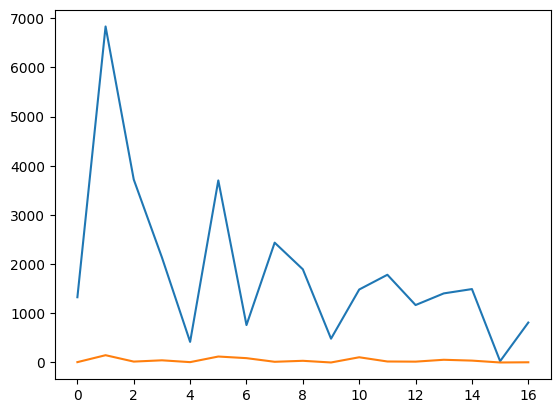

In [12]:
import matplotlib.pyplot as plt

_, axe = plt.subplots()
axe.plot(df_combined['어린이CCTV_COUNT'])
axe.plot(df_combined['노인장애인CCTV_COUNT'])

In [9]:
np.corrcoef(df_combined['어린이CCTV_COUNT'], df_combined['노인장애인CCTV_COUNT'])

array([[1.        , 0.66061138],
       [0.66061138, 1.        ]])